In [27]:
import os
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('../../src/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import ResNet as net
import argparse

noise = 0.1
step_size = 4
letter = 'a'
system = 'hopf'

# adjustables
lr = 1e-3                     # learning rate
max_epoch = 1000            # the maximum training epoch 
batch_size = 320              # training batch size



    
# paths
try:
    print(data_dir)
except:
    data_dir = os.path.join('../../data/', system)
    
model_dir = os.path.join('../../models/', system)

# global const
n_forward = 4

# load data
try:
    train_data = np.load(os.path.join(data_dir, train_data_file))
except:
    train_data = np.load(os.path.join(data_dir, 'train_noise{}.npy'.format(noise)))
    
print("train_data.shape = ", train_data.shape)
    
try:
    val_data = np.load(os.path.join(data_dir, 'val_noise{}.npy'.format(noise)))
except:
    print("no validation found, using training.")
    val_data = train_data
    
try:
    test_data = np.load(os.path.join(data_dir, 'test_noise{}.npy'.format(noise)))
except:
    print("no testing found, using training.")
    test_data = train_data
n_train, _, ndim = train_data.shape
n_val = val_data.shape[0]
n_test = test_data.shape[0]
    
    

if 'KS' in system:
#     smallest_step = 1
    dt = 0.025
    if step_size > 36:
        arch = [ndim, 512, ndim]
    else:
        arch = [ndim, 2048, ndim]
                
elif "VanDerPol" in system:
    dt = 0.01
    arch = [2, 512, 512, 512, 2]
    
elif "Lorenz" in system:
    dt = 0.0005
    arch = [3, 1024, 1024, 1024, 3]
    
elif "hyperbolic" in system:
    dt = 0.01
    arch = [4, 128, 128, 128, 2] 
    
elif  "cubic" in system:
    dt = 0.01
    arch = [2, 256, 256, 256, 2] 
    
elif "hopf" in system:
    dt = 0.01
    arch = [3, 128, 128, 128, 3]
    
else:
    print("system not available")
    raise SystemExit()



../../data/hopf
train_data.shape =  (3200, 5121, 3)


In [28]:
# create dataset object
for input_forward in [1, 2, 3, 4, 8, 16]:
#     arch = [2 * input_forward, 128, 128, 128, 2] 
    arch = [3 * input_forward, 128, 128, 128, 3]
    dataset = net.DataSet(train_data, val_data, test_data, dt, step_size, n_forward, input_forward=input_forward)

    model_name = 'original_model_D{}_noise{}_{}_input{}.pt'.format(step_size, noise, letter, input_forward)

    # # create/load model object
    # try:
    #     device = 'cuda' if torch.cuda.is_available() else 'cpu'
    #     model = torch.load(os.path.join(model_dir, model_name), map_location=device)
    #     model.device = device
    # except:
    print('create model {} ...'.format(model_name))
    model = net.ResNet(arch=arch, dt=dt, step_size=step_size)

    # training
    model.train_net(dataset, max_epoch=max_epoch, batch_size=batch_size, lr=lr,
                    model_path=os.path.join(model_dir, model_name))


self.train_x =  torch.Size([3200, 1, 3])
self.train_ys =  torch.Size([3200, 4, 3])
self.val_x =  torch.Size([320, 1, 3])
self.test_x =  torch.Size([320, 1, 3])
create model original_model_D4_noise0.1_a_input1.pt ...
time for first 10 =  0.14091897010803223
epoch 100, training loss 0.0011250110110267997, validation loss 0.0012506372295320034
(--> new model saved @ epoch 100)
epoch 200, training loss 0.001050284132361412, validation loss 0.001234732335433364
(--> new model saved @ epoch 200)
epoch 300, training loss 0.0010080316569656134, validation loss 0.0012477402342483401
epoch 400, training loss 0.0009708898141980171, validation loss 0.0012633417500182986
epoch 500, training loss 0.0009313278133049607, validation loss 0.0012841796269640326
epoch 600, training loss 0.0008917904342524707, validation loss 0.0013162563554942608
epoch 700, training loss 0.0008593296515755355, validation loss 0.0013772386591881514
epoch 800, training loss 0.0008509053150191903, validation loss 0.001467796

In [29]:
train_data1 = np.load(os.path.join(data_dir, 'train_noise{}.npy'.format(0.0)))
train_data = np.load(os.path.join(data_dir, 'train_noise{}.npy'.format(noise)))

mse = np.mean((train_data - train_data1)**2)
print(mse)

0.0006269152194829694


In [4]:
# a = np.array([-0.1280, -0.9481, -0.1275, -0.8740, -0.1270, -0.8055]).reshape(3,2)
# b =np.array([[-0.1265, -0.7422],
#         [-0.1260, -0.6837],
#         [-0.1255, -0.6298],
#         [-0.1250, -0.5800]])
# c = np.concatenate((a,b))
# print(c)
# d = train_data[0, :8*(step_size-1):step_size]
# print(d)

# print(d - c)




In [5]:
# x_idx = 0
# x_end_idx = x_idx + step_size*input_forward
# y_start_idx = x_end_idx #+ step_size
# y_end_idx = x_end_idx + step_size*n_forward #+ 1

# nums = np.arange(0,100)
# print(nums)

# print(nums[x_idx:x_end_idx:step_size])
# print(nums[y_start_idx:y_end_idx:step_size])
# # self.train_x = torch.tensor(train_data[:, x_idx:x_end_idx:step_size, :]).float()
# # self.train_ys = torch.tensor(train_data[:, y_start_idx:y_end_idx:step_size, :]).float()

self.train_x =  torch.Size([3200, 4, 3])
self.train_ys =  torch.Size([3200, 4, 3])
self.val_x =  torch.Size([320, 4, 3])
self.test_x =  torch.Size([320, 4, 3])
preds shape =  (320, 3, 1251)
steps shape =  1251


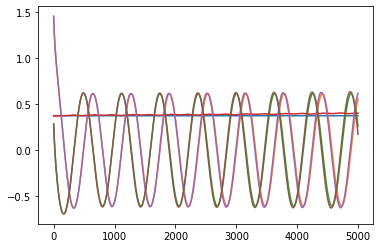

In [13]:
input_forward = 4
dataset = net.DataSet(train_data, val_data, test_data, dt, step_size, n_forward, input_forward=input_forward)

model_name = 'original_model_D{}_noise{}_{}_input{}.pt'.format(step_size, noise, letter, input_forward)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = torch.load(os.path.join(model_dir, model_name), map_location=device)
model.device = device

steps = 5000
y_preds = model.uni_scale_forecast(dataset.test_x, steps)
idx = 0
plt.plot(test_data[idx,:steps])
plt.plot(y_preds[idx])
# plt.plot(np.arange(0,steps,64), y_preds[idx,::64, 0], '.')
# plt.plot(np.arange(0,steps,64), y_preds[idx,::64, 1], '.')


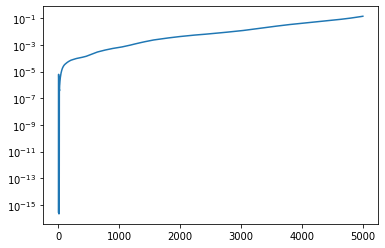

In [7]:
mse = ((y_preds - test_data[:,:steps,:])**2).mean(axis = (0,2))
plt.semilogy(mse)

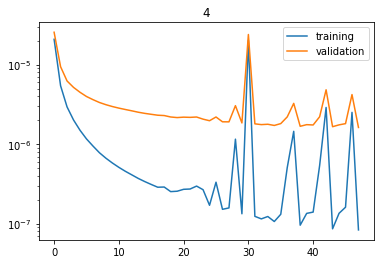

In [8]:
model.plot_loss()

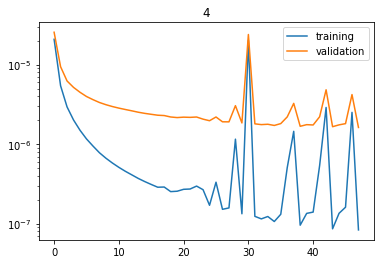

In [9]:
model.plot_loss()

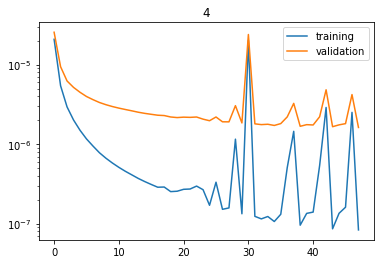

In [10]:
model.plot_loss()

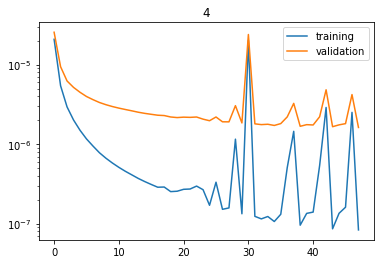

In [11]:
model.plot_loss()

In [ ]:
for input_forward in [1, 2, 3, 4, 8, 16]:
    dataset = net.DataSet(train_data, val_data, test_data, dt, step_size, n_forward, input_forward=input_forward)

    model_name = 'original_model_D{}_noise{}_{}_input{}.pt'.format(step_size, noise, letter, input_forward)
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model = torch.load(os.path.join(model_dir, model_name), map_location=device)
    model.device = device

    steps = 5000
    y_preds = model.uni_scale_forecast(dataset.test_x, steps)
#     idx = 0
#     plt.plot(test_data[idx,:steps])
#     plt.plot(y_preds[idx])

    mse = ((y_preds - test_data[:,:steps,:])**2).mean(axis = (0,2))
    plt.semilogy(mse, label = str(input_forward))
plt.ylim([1e-6, 1])

train_data1 = np.load(os.path.join(data_dir, 'train_noise{}.npy'.format(0.0)))
train_data = np.load(os.path.join(data_dir, 'train_noise{}.npy'.format(noise)))

mse = np.mean((train_data - train_data1)**2, axis = (0,2))
plt.semilogy(mse, label = "perfect")

plt.legend()
plt.show()
# plt.plot(np.arange(0,steps,64), y_preds[idx,::64, 0], '.')
# plt.plot(np.arange(0,steps,64), y_preds[idx,::64, 1], '.')


self.train_x =  torch.Size([3200, 1, 3])
self.train_ys =  torch.Size([3200, 4, 3])
self.val_x =  torch.Size([320, 1, 3])
self.test_x =  torch.Size([320, 1, 3])
preds shape =  (320, 3, 1251)
steps shape =  1251
self.train_x =  torch.Size([3200, 2, 3])
self.train_ys =  torch.Size([3200, 4, 3])
self.val_x =  torch.Size([320, 2, 3])
self.test_x =  torch.Size([320, 2, 3])
preds shape =  (320, 3, 1251)
steps shape =  1251
self.train_x =  torch.Size([3200, 3, 3])
self.train_ys =  torch.Size([3200, 4, 3])
self.val_x =  torch.Size([320, 3, 3])
self.test_x =  torch.Size([320, 3, 3])


self.train_x =  torch.Size([3200, 1, 3])
self.train_ys =  torch.Size([3200, 4, 3])
self.val_x =  torch.Size([320, 1, 3])
self.test_x =  torch.Size([320, 1, 3])
preds shape =  (320, 3, 1251)
steps shape =  1251
self.train_x =  torch.Size([3200, 2, 3])
self.train_ys =  torch.Size([3200, 4, 3])
self.val_x =  torch.Size([320, 2, 3])
self.test_x =  torch.Size([320, 2, 3])
preds shape =  (320, 3, 1251)
steps shape =  1251
self.train_x =  torch.Size([3200, 3, 3])
self.train_ys =  torch.Size([3200, 4, 3])
self.val_x =  torch.Size([320, 3, 3])
self.test_x =  torch.Size([320, 3, 3])
preds shape =  (320, 3, 1251)
steps shape =  1251
self.train_x =  torch.Size([3200, 4, 3])
self.train_ys =  torch.Size([3200, 4, 3])
self.val_x =  torch.Size([320, 4, 3])
self.test_x =  torch.Size([320, 4, 3])
preds shape =  (320, 3, 1251)
steps shape =  1251
self.train_x =  torch.Size([3200, 8, 3])
self.train_ys =  torch.Size([3200, 4, 3])
self.val_x =  torch.Size([320, 8, 3])
self.test_x =  torch.Size([320, 8, 3])


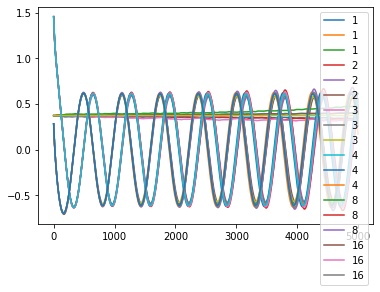

In [16]:
for input_forward in [1, 2, 3, 4, 8, 16]:
    dataset = net.DataSet(train_data, val_data, test_data, dt, step_size, n_forward, input_forward=input_forward)

    model_name = 'original_model_D{}_noise{}_{}_input{}.pt'.format(step_size, noise, letter, input_forward)
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model = torch.load(os.path.join(model_dir, model_name), map_location=device)
    model.device = device

    steps = 5000
    y_preds = model.uni_scale_forecast(dataset.test_x, steps)
    idx = 0
#     plt.plot(test_data[idx,:steps])
    plt.plot(y_preds[idx], label = str(input_forward))
plt.plot(test_data[idx,:steps])
plt.legend()
plt.show()